<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Predict_Income_Adult_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###########################################################################################
#
# Predict_Income_Adult_2.ipynb
#
# Predict whether income exceeds $50K/yr based on census data. 
# Also known as "Census Income" dataset.
# UCI data set name: Adult (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)
#
# Created by Jonggil Nam
# LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
# Github: https://github.com/woodstone10
# e-mail: woodstone10@gmail.com
# phone: +82-10-8709-6299
###########################################################################################
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model
import sklearn.ensemble
import sklearn.neural_network
import sklearn.naive_bayes
import sklearn.tree
import sklearn.svm

In [3]:
# Data set from UCI Machine Learning Repository
#  - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Listing of attributes:
# 1. age: continuous.
# 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
#       State-gov, Without-pay, Never-worked.
# 3. fnlwgt: continuous.
# 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
#       9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# 5. education-num: continuous.
# 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
#       Married-spouse-absent, Married-AF-spouse.
# 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
#       Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,
#       Priv-house-serv, Protective-serv, Armed-Forces.
# 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# 10. sex: Female, Male.
# 11. capital-gain: continuous.
# 12. capital-loss: continuous.
# 13. hours-per-week: continuous.
# 14. native-country: United-States, Cambodia, England, Puerto-Rico,
#       Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
#       Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic,
#       Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,
#       El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# dataset from github (UCI)
#a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', error_bad_lines=False)
a = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.data', sep= ',', header= None,skiprows=1)
b = pd.read_csv('https://raw.githubusercontent.com/woodstone10/dataset/main/adult.test', sep= ',', header= None,skiprows=1)
df = pd.concat([a, b])
print(df.head())

   0                  1       2           3   ...  11  12              13      14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
1  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
2  53            Private  234721        11th  ...   0  40   United-States   <=50K
3  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K
4  37            Private  284582     Masters  ...   0  40   United-States   <=50K

[5 rows x 15 columns]


In [4]:
data = df
data.replace({
    ' <=50K':0,
    ' <=50K.':0,
    ' >50K':1,
    ' >50K.':1,
},inplace=True)
print(data.head())


   0                  1       2           3   ...  11  12              13 14
0  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States  0
1  38            Private  215646     HS-grad  ...   0  40   United-States  0
2  53            Private  234721        11th  ...   0  40   United-States  0
3  28            Private  338409   Bachelors  ...   0  40            Cuba  0
4  37            Private  284582     Masters  ...   0  40   United-States  0

[5 rows x 15 columns]


In [5]:
# encoding using sklearn LabelEncoder (string to numeric)
transform_needed = [False, True, False, True, False, True, True, True, True, True, False, False, False, True, False]
encoded_data = np.zeros(shape=(data.shape[0], data.shape[1]), dtype=np.int)
for i in range(len(transform_needed)):
    if transform_needed[i]:
        tmp_data = data.iloc[:, i].tolist()
        encoder = sklearn.preprocessing.LabelEncoder()
        encoder.fit(tmp_data)
        encoded_data[:, i] = encoder.transform(tmp_data)
    else:
        encoded_data[:, i] = data.iloc[:, i].tolist()
print(encoded_data)


[[    50      6  83311 ...     13     39      0]
 [    38      4 215646 ...     40     39      0]
 [    53      4 234721 ...     40     39      0]
 ...
 [    38      4 374983 ...     50     39      0]
 [    44      4  83891 ...     40     39      0]
 [    35      5 182148 ...     60     39      1]]


In [7]:
# encoded data X and y
X = encoded_data[:,:14]
y = encoded_data[:,14]
print(X)

[[    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 [    53      4 234721 ...      0     40     39]
 ...
 [    38      4 374983 ...      0     50     39]
 [    44      4  83891 ...      0     40     39]
 [    35      5 182148 ...      0     60     39]]


In [8]:
# encoded data split into train 80%, test 20%
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print("total data size:",X.shape, "train data size:",X_train.shape, "test data size:",X_test.shape)


total data size: (48841, 14) train data size: (39072, 14) test data size: (9769, 14)


In [22]:
# ------------------------------------------------------------------
# Model. Artificial Neural Network Deep Learning using Keras high-level API
# ------------------------------------------------------------------
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=X_train[1].shape),
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(300, activation='relu'),
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(100, activation='relu'),
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid') # output is 1 or o, so sigmoid function is used
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    loss=tf.keras.losses.binary_crossentropy, # prediction is 1 or 0, so binary_crossentropy is selected.
    metrics=['accuracy']
)

history = model.fit(X_train, y_train,
                    validation_split=0.3, # train data split into train 70%, validation 30%
                    epochs=30,
                    verbose=1 # online display with progressbar
                    )

Epoch 1/30
855/855 [==============================] - 3s 3ms/step - loss: 267.6727 - accuracy: 0.7110 - val_loss: 0.5861 - val_accuracy: 0.7613
Epoch 2/30
855/855 [==============================] - 2s 2ms/step - loss: 0.5742 - accuracy: 0.7618 - val_loss: 0.5536 - val_accuracy: 0.7620
Epoch 3/30
855/855 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7621 - val_loss: 0.5463 - val_accuracy: 0.7638
Epoch 4/30
855/855 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7602 - val_loss: 0.5484 - val_accuracy: 0.7620
Epoch 5/30
855/855 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7630 - val_loss: 0.5473 - val_accuracy: 0.7628
Epoch 6/30
855/855 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7622 - val_loss: 0.5616 - val_accuracy: 0.7610
Epoch 7/30
855/855 [==============================] - 2s 2ms/step - loss: 0.6862 - accuracy: 0.7588 - val_loss: 0.5498 - val_accuracy: 0.7610
Epoc

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 14)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               4500      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 35,621
Trainable params: 35,621
Non-trainable params: 0
_________________________________________________________________


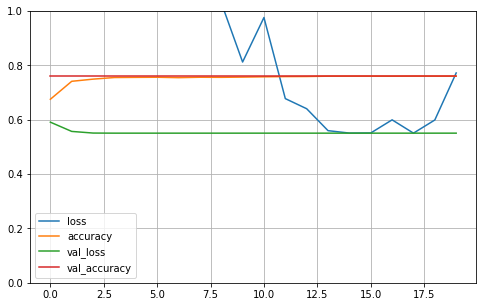

In [16]:
# Learning curve (loss and accuracy)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

306/306 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7625


[0.5481369495391846, 0.762514054775238]

In [34]:
print(y_test[:20])
y_proba = model.predict(X_test[:20])
y_proba.round(2)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


array([[0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24],
       [0.24]], dtype=float32)

In [35]:
y_pred = model.predict_classes(X_test[:20])
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

Loss and accuracy are not good enough. I have tried change number of layers and neuron, but accuracy is under 80%. Will keep try to find a way to improve performance.

In [36]:
# ------------------------------------------------------------------
# Model. Implementing Batch Normalizaiton
# ------------------------------------------------------------------
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=X_train[1].shape),        
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300, activation='relu'),
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation='relu'),
        #tf.keras.layers.Dropout(0.3), # for reduce overfitting
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid') # output is 1 or o, so sigmoid function is used
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    loss=tf.keras.losses.binary_crossentropy, # prediction is 1 or 0, so binary_crossentropy is selected.
    metrics=['accuracy']
)

history = model.fit(X_train, y_train,
                    validation_split=0.3, # train data split into train 70%, validation 30%
                    epochs=30,
                    verbose=1 # online display with progressbar
                    )

Epoch 1/30
855/855 [==============================] - 4s 3ms/step - loss: 0.4542 - accuracy: 0.7987 - val_loss: 0.3471 - val_accuracy: 0.8377
Epoch 2/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3452 - accuracy: 0.8385 - val_loss: 0.3381 - val_accuracy: 0.8395
Epoch 3/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3396 - accuracy: 0.8425 - val_loss: 0.3361 - val_accuracy: 0.8393
Epoch 4/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3432 - accuracy: 0.8403 - val_loss: 0.3338 - val_accuracy: 0.8421
Epoch 5/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3393 - accuracy: 0.8404 - val_loss: 0.3333 - val_accuracy: 0.8418
Epoch 6/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3420 - accuracy: 0.8397 - val_loss: 0.3335 - val_accuracy: 0.8428
Epoch 7/30
855/855 [==============================] - 3s 3ms/step - loss: 0.3387 - accuracy: 0.8442 - val_loss: 0.3330 - val_accuracy: 0.8407
Epoch 

Improved performance by batch normalization.

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 14)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14)                56        
_________________________________________________________________
dense_26 (Dense)             (None, 300)               4500      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_27 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

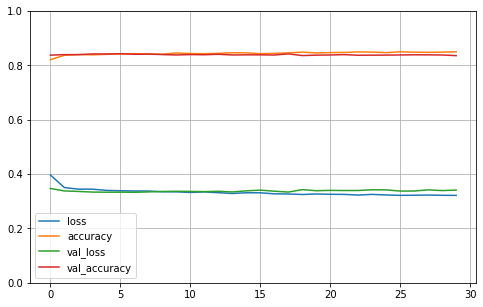

In [38]:
# Learning curve (loss and accuracy)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

it's great improvement by batch normalization